# Competition

[Kaggle Link](https://www.kaggle.com/competitions/tabular-playground-series-mar-2022/data)

# Tanım

- Tarih verilmiş
- x, y verilmiş 
- yön verilmiş
- trafik verilmiş/isteniyor
  
# Preprocessing

- Yön verisini One-Hot yapmak
- NaN yok
- Normalize bir veri
- Time verisini kullanılabilecek bir hale getirmek
  - Her 20 dakikayı ayırmak
  - Her saati ayırmak
  - Her günü ayırmak
  - Gün verisinden kurtulup sadece veri üstünde çalışmak
  
# Gruplar

## Preprocessing

- Ayfer Sinem Çoban
- Onur Ümit Şener
  
## Modelling

- Ata Güneş
- Mertcan Duran
- Oğulcan Akca
  
## Presentation

- Başak Topçuoğlu
- Saitcan Yıldırım


# Code

## Imports

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

## Data Init

In [70]:
raw_data = pd.read_csv('train.csv')

In [71]:
INTERVAL_20_MINUTES = 65
INTERVAL_HOUR = 260
INTERVAL_DAY = 4680
INTERVAL_WEEK = 32760
TOTAL_ROWS = raw_data.shape[0]
INTERVALS = (INTERVAL_20_MINUTES,
             INTERVAL_HOUR,
             INTERVAL_DAY,
             INTERVAL_WEEK
             )

## Datetime Conversion


In [75]:
raw_data['time'] = pd.to_datetime(raw_data['time'])

In [83]:
df = raw_data.drop('row_id', axis=1).copy()

## Adding Hours, Minutes, Months

In [84]:
hours_list = []
minutes_list = []
month_list = []
season_list = []
for t in df['time']:
    hours_list.append(t.hour)
    minutes_list.append(t.minute // 20)
    month_list.append(t.month)


In [85]:
time_df = pd.DataFrame({'hours': hours_list,
                        'minutes': minutes_list,
                        'month': month_list,
                        })
df = pd.concat([df, time_df], axis=1)

In [88]:
df = df[['time', 'hours', 'minutes', 'month', 'x', 'y', 'direction', 'congestion']]

In [89]:
df.sample(5)

,time,hours,minutes,month,x,y,direction,congestion
417946,1991-06-29 13:40:00,13,2,6,2,3,NE,23
286253,1991-06-01 09:00:00,9,0,6,2,2,WB,63
85792,1991-04-19 07:40:00,7,2,4,2,2,SW,58
301305,1991-06-04 14:20:00,14,1,6,1,2,SB,57
510734,1991-07-19 10:00:00,10,0,7,1,2,NE,46


### Adding Days

In [90]:
weekdays = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
days = {}
days_list = [None] * TOTAL_ROWS
for i in range(7):
    days[i] = range(i, TOTAL_ROWS, 7)
for j in range(7):   
    for k in days[j]:
        days_list[k] = weekdays[j]
df.insert(1, 'days', days_list)

In [91]:
df.sample(5)

,time,days,hours,minutes,month,x,y,direction,congestion
351592,1991-06-15 08:20:00,Thursday,8,1,6,0,2,EB,51
479850,1991-07-12 19:20:00,Monday,19,1,7,1,0,SB,29
110572,1991-04-24 17:40:00,Monday,17,2,4,0,2,EB,51
842604,1991-09-29 04:00:00,Monday,4,0,9,0,2,SB,53
48295,1991-04-11 07:40:00,Wednesday,7,2,4,0,0,EB,42


## One-Hot

In [99]:
df_oh = pd.get_dummies(df, dtype=int)
df_oh.drop('time', axis=1, inplace=True)

In [100]:
df_oh

,hours,minutes,month,x,y,congestion,days_Friday,days_Monday,days_Saturday,days_Sunday,...,days_Tuesday,days_Wednesday,direction_EB,direction_NB,direction_NE,direction_NW,direction_SB,direction_SE,direction_SW,direction_WB
0,0,0,4,0,0,70,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,4,0,0,49,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,4,0,0,24,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,4,0,1,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,4,0,1,60,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,11,2,9,2,3,54,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
848831,11,2,9,2,3,28,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
848832,11,2,9,2,3,68,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
848833,11,2,9,2,3,17,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Export

In [101]:
df_oh.to_csv('df.csv')

# USELESS/VISUALIZATION

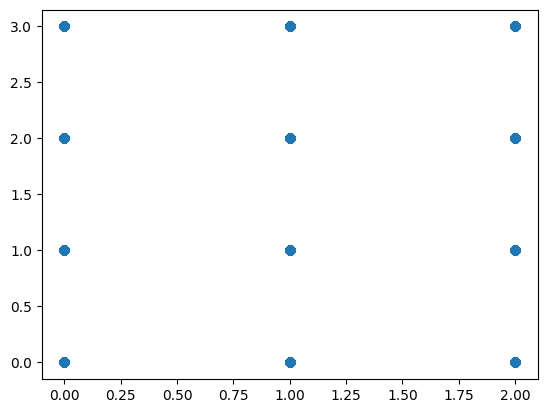

In [3]:
plt.scatter(df['x'],df['y'])

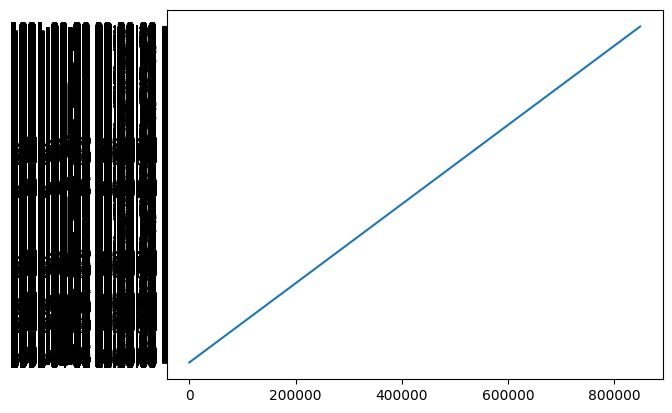

In [45]:
plt.plot(df['time'])

In [33]:
df_oh['congestion'].describe()

count    848835.000000
mean         47.815305
std          16.799392
min           0.000000
25%          35.000000
50%          47.000000
75%          60.000000
max         100.000000
Name: congestion, dtype: float64

In [48]:
df_oh['time'].str.get_dummies(' ')

,00:00:00,00:20:00,00:40:00,01:00:00,01:20:00,01:40:00,02:00:00,02:20:00,02:40:00,03:00:00,...,20:40:00,21:00:00,21:20:00,21:40:00,22:00:00,22:20:00,22:40:00,23:00:00,23:20:00,23:40:00
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
